In [2]:
# Importar las librerías principales
import numpy as np  # Para cálculos numéricos y manejo de areglos
import pandas as pd  # Para manipulación de datos
import seaborn as sns  # Para visualización de datos
import matplotlib.pyplot as plt  # Para gráficos

# Librerías adicionales
from sklearn.model_selection import train_test_split  # Para dividir los datos
from sklearn.linear_model import LinearRegression  # Para el modelo de Regresión Lineal
from sklearn.preprocessing import StandardScaler  # Para escalar los datos
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluar el modelo

In [4]:
# Cargar dataset
df = pd.read_csv('Car details v3.csv')

# Verificar cargue datos
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Ver las dimensiones del dataset
df.shape

(8128, 13)

In [8]:
# Resumen estadístico de las variables numéricas
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
# Verificar tipos de datos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
#Verificar VAlores faltantes
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

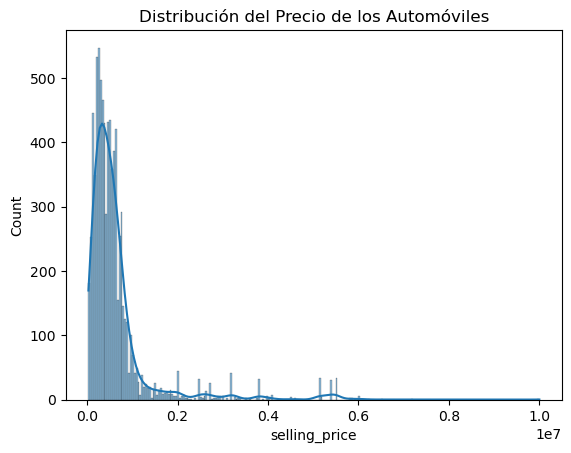

In [14]:
# Distribución del precio
sns.histplot(df['selling_price'], kde=True)
plt.title("Distribución del Precio de los Automóviles")
plt.show()

In [16]:
# Ver las columnas que contienen valores de texto
print(df.select_dtypes(include='object').columns)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque'],
      dtype='object')


In [18]:
# Para 'mileage', 'engine', 'max_power' y 'torque', extraemos el primer número encontrado, ignorando unidades.
df['mileage'] = df['mileage'].fillna('').astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['engine'] = df['engine'].fillna('').astype(str).str.extract(r'(\d+)').astype(float)
df['max_power'] = df['max_power'].fillna('').astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['torque'] = df['torque'].fillna('').astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

In [20]:
# Extraer la primera palabra de cada valor en la columna 'name' y asignarla a una nueva columna 'make'
df['make'] = df['name'].str.split().str[0]

# Eliminar la columna 'name'
df.drop(columns=['name'], inplace=True)

In [22]:
# Aplicar One-Hot Encoding a las variables categóricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [24]:
# Verificar que todas las columnas sean numéricas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8128 non-null   int64  
 1   selling_price                 8128 non-null   int64  
 2   km_driven                     8128 non-null   int64  
 3   mileage                       7907 non-null   float64
 4   engine                        7907 non-null   float64
 5   max_power                     7912 non-null   float64
 6   torque                        7906 non-null   float64
 7   seats                         7907 non-null   float64
 8   make                          8128 non-null   object 
 9   fuel_Diesel                   8128 non-null   bool   
 10  fuel_LPG                      8128 non-null   bool   
 11  fuel_Petrol                   8128 non-null   bool   
 12  seller_type_Individual        8128 non-null   bool   
 13  sel

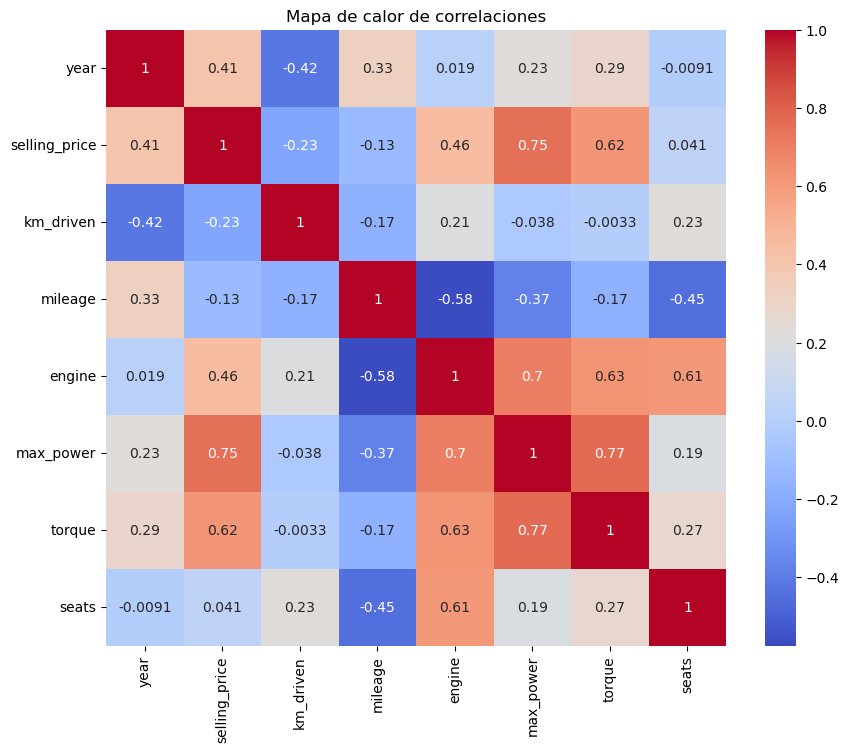

In [26]:
# Seleccionar solo las columnas numéricas para evitar errores de tipo
numerical_data = df.select_dtypes(include=[float, int])

# Crear el mapa de calor con el conjunto de datos numéricos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

In [28]:
# Eliminar valores nulos
df.dropna(inplace=True)

# Codificar variables categóricas
df = pd.get_dummies(df, drop_first=True)

In [30]:
# Calcular correlación con la variable objetivo (precio)
correlation_matrix = df.corr()
relevant_features = correlation_matrix['selling_price'].sort_values(ascending=False)
print(relevant_features)

selling_price                   1.000000
max_power                       0.749674
torque                          0.619792
make_BMW                        0.530173
engine                          0.455682
year                            0.412302
make_Lexus                      0.363541
make_Volvo                      0.297988
make_Jaguar                     0.265111
fuel_Diesel                     0.204831
make_Mercedes-Benz              0.185590
make_Audi                       0.172014
owner_Test Drive Car            0.116081
make_Jeep                       0.115668
make_Toyota                     0.109607
make_Land                       0.100222
seats                           0.041617
make_Isuzu                      0.039957
seller_type_Trustmark Dealer    0.032779
make_MG                         0.027147
make_Kia                        0.023637
make_Mitsubishi                 0.008681
make_Force                      0.008052
make_Ashok                     -0.004836
make_Skoda      

In [34]:
# Definir X (variables independientes) e y (variable dependiente)
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

MAE: 157868.66124826003, MSE: 82535161297.61978, RMSE: 287289.33376932004, R²: 0.881292716081747


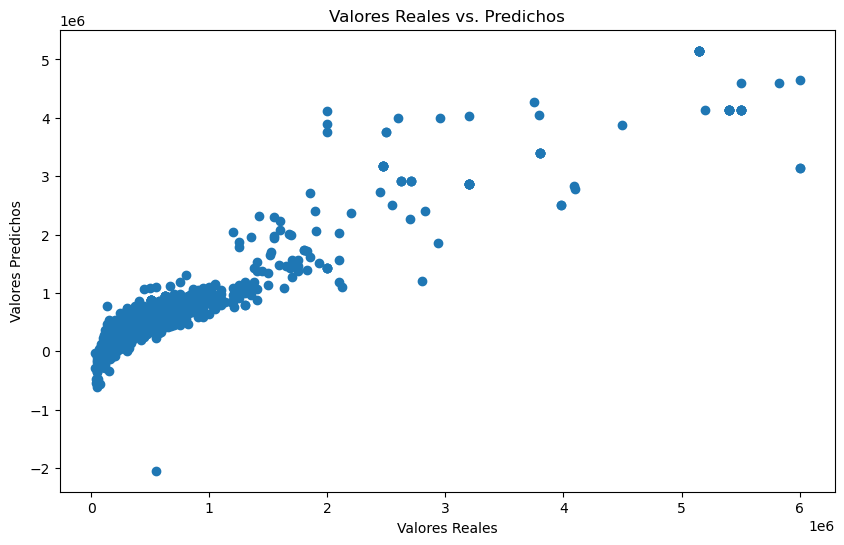

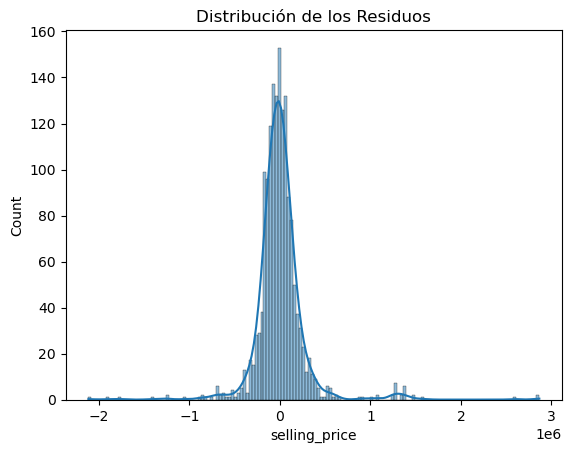

In [42]:
# Comparación entre valores reales y predichos
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

# Distribución de los residuos
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribución de los Residuos")
plt.show()